# 숫자 분류 모델 제작
- 입력은 흰 바탕에 빨간색으로 숫자가 적힌 이미지
- mnist 데이터셋을 변형하여 학습함

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

## 데이터 가져오기

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## 데이터 전처리
- 1채널인 mnist 데이터를 3채널(rgb) 이미지로 바꾸고, 배경은 흰색, 숫자는 빨간색으로 바꿈

In [3]:
x_train_s = []
for i in range(60000):
    rgb = cv2.cvtColor(x_train[i], cv2.COLOR_GRAY2RGB)
    rgb = cv2.bitwise_not(rgb)
    rgb[:, :, 0] = 0xFF
    x_train_s.append(rgb)

x_train_s = np.array(x_train_s)
x_train_s.shape

(60000, 28, 28, 3)

In [4]:
x_test_s = []
for i in range(10000):
    rgb = cv2.cvtColor(x_test[i], cv2.COLOR_GRAY2RGB)
    rgb = cv2.bitwise_not(rgb)
    rgb[:, :, 0] = 0xFF
    x_test_s.append(rgb)

x_test_s = np.array(x_test_s)
x_test_s.shape

(10000, 28, 28, 3)

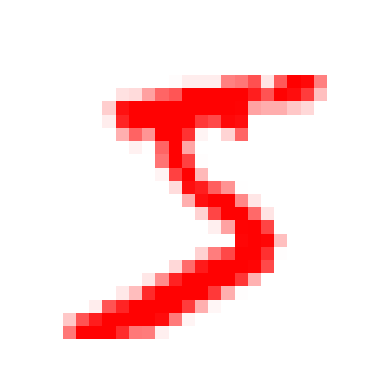

In [5]:
plt.imshow(x_train_s[0])
plt.axis('off')
plt.show()

## 모델 구성
- 이미지 처리에 많이 쓰이는 합성곱 신경망을 사용함

In [6]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

kernel_size = (3, 3)

model = Sequential([
    Conv2D(32, kernel_size, activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

## 모델 학습
- 검증 데이터 기준 98% 정확도

In [7]:
history = model.fit(
    x_train_s, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test_s, y_test),
    verbose=2
)

Epoch 1/5
469/469 - 17s - loss: 1.2312 - accuracy: 0.7717 - val_loss: 0.2026 - val_accuracy: 0.9419 - 17s/epoch - 36ms/step
Epoch 2/5
469/469 - 15s - loss: 0.2168 - accuracy: 0.9381 - val_loss: 0.1192 - val_accuracy: 0.9652 - 15s/epoch - 32ms/step
Epoch 3/5
469/469 - 14s - loss: 0.1549 - accuracy: 0.9557 - val_loss: 0.1008 - val_accuracy: 0.9721 - 14s/epoch - 30ms/step
Epoch 4/5
469/469 - 13s - loss: 0.1247 - accuracy: 0.9641 - val_loss: 0.0781 - val_accuracy: 0.9787 - 13s/epoch - 29ms/step
Epoch 5/5
469/469 - 14s - loss: 0.1107 - accuracy: 0.9690 - val_loss: 0.0854 - val_accuracy: 0.9761 - 14s/epoch - 29ms/step


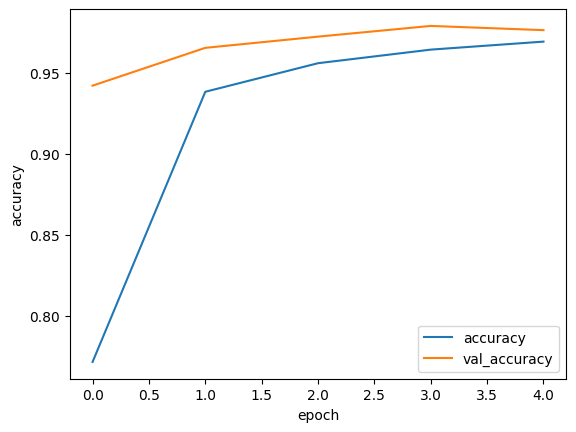

In [8]:
# draw accuracy and val_accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 모델 저장

In [12]:
model.save("model.h5")